# JointLkl tutorial

This notebook illustrates how to call `gLike` objects from python (note you have to configure your `ROOT` to work with python at first).

This notebook replicates the tutorial in `gLike/scripts/testJointLkl.C`.

In [1]:
# load gLike classes in ROOT, output should be 0 for succesful loading
from ROOT import gInterpreter, gSystem
gInterpreter.ProcessLine('#include "../include/PoissonLkl.h"')
gSystem.Load("../lib/libgLike.so")

Welcome to JupyROOT 6.14/04


0

In [2]:
# now PoissonLkl and JointLkl can be imported from ROOT
from ROOT import PoissonLkl, JointLkl

## Definition of a JointLkl object
Let us define a list of two on and off counts, to each pair of on / off we will associate a PoissonLkl object

In [3]:
n_on = [130, 90]
n_off = [105, 120]

create the JointLkl object that will contain them, initialise it with two PoissonLkl

In [4]:
error_def = 4
j = JointLkl()
j.SetErrorDef(error_def)

loop through the on and off count list, define PoissonLkl objects and add them to the JointLkl

In [5]:
p_list = [] # list of PoissonLkl objects building JointLkl
for index, (on, off) in enumerate(zip(n_on, n_off)):
    p = PoissonLkl(on, off)
    p.SetName(f"PoissonLkl_{index}")
    p_list.append(p)
    j.AddSample(p)

In [6]:
j.PrintData()

 *              Object Name : JointLkl
 *             # of samples = 2
 ****************************************
                                        *              Object Name : PoissonLkl_0
                                        *                     Non  = 130
                                        *                     Noff = 105
                                        *            Measured tau  = 1 +/- 0
                                        *            Measured Deff = 1 +/- 0
                                        *     Fraction of G in Off = 0
                                        *  Foreground events in On = 0
                                        *    Background in On (b) is NUISANCE
                                        ****************************************
                                        *              Object Name : PoissonLkl_1
                                        *                     Non  = 90
                                        *         

Call the minimisation and plot the results

In [7]:
j.ComputeLklVsG()
j.PrintOverview()

Lkl::ComputeLklVsG (JointLkl) Message: Finding minimum of -2logL... 
Lkl::MinimizeLkl (JointLkl) Message: minimizing -2logL
Lkl::CallMinimization (JointLkl) Results: Trial #1, g: -4.11e+00 +/- 2.12e+01 (-4.11e+00 +/- 2.12e+01); -2logL = 32.9816; iflag = 0 (converged)
JointLkl::PrepareForLklScan (JointLkl) Message: call ComputeLklVsG for 2 samples:
Lkl::ComputeLklVsG (PoissonLkl_0) Message: computing -2logL in 200 points between g=-34.1191(-34.1191), and g=25.8966(25.8966), this could take a while
.................... Completed 200 points
Lkl::ComputeLklVsG (PoissonLkl_1) Message: computing -2logL in 200 points between g=-34.1191(-34.1191), and g=25.8966(25.8966), this could take a while
.................... Completed 200 points
Lkl::ComputeLklVsG (JointLkl) Message: computing -2logL in 200 points between g=-34.1191(-34.1191), and g=25.8966(25.8966), this could take a while
.................... Completed 200 points
Lkl::ComputeLklVsG (JointLkl) Message: g_min = -3.96041 +/- 21.1248 (-3.

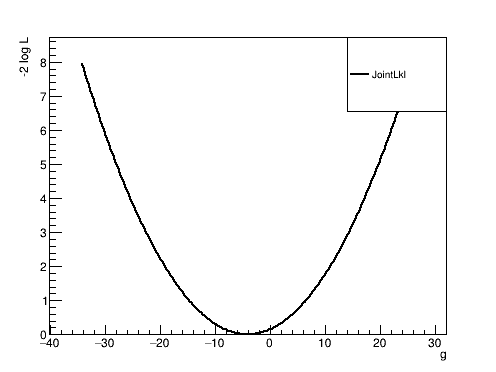

In [8]:
# plot the profiled likelihood with ROOT
from ROOT import TCanvas, TLegend
c = TCanvas("canvas", "canvas", 500, 400)
legend = TLegend(0.7, 0.7, 0.9, 0.9)
legend.SetTextSize(0.03)
lkl_vs_g = j.GetLklVsG() # TGraph holding the profile
lkl_vs_g.SetTitle("")
lkl_vs_g.GetXaxis().SetTitle("g")
lkl_vs_g.GetYaxis().SetTitle("-2 log L")
lkl_vs_g.SetLineWidth(2)
legend.AddEntry(lkl_vs_g, "JointLkl")
lkl_vs_g.Draw()
legend.Draw("same")
c.Draw() # in pyroot also the canvas has to be drawn

## compare the results of the joint and the individual PoissonLkl

Lkl::ComputeLklVsG (PoissonLkl_0) Message: Finding minimum of -2logL... 
Lkl::MinimizeLkl (PoissonLkl_0) Message: minimizing -2logL
Lkl::CallMinimization (PoissonLkl_0) Results: Trial #1, g: 2.50e+01 +/- 3.06e+01 (2.50e+01 +/- 3.06e+01); b: 1.05e+02 +/- 2.05e+01; tau: 1.00e+00 +/- 0.00e+00; eff: 1.00e+00 +/- 0.00e+00; -2logL = 13.2001; iflag = 0 (converged)
Lkl::ComputeLklVsG (PoissonLkl_0) Message: computing -2logL in 200 points between g=-18.3264(-18.3264), and g=68.3534(68.3534), this could take a while
.................... Completed 200 points
Lkl::ComputeLklVsG (PoissonLkl_0) Message: g_min = 24.7957 +/- 31.1316 (24.7957 +/- 31.1316), -2logLmin = 13.2003
 *  Name              = PoissonLkl_0
 *  Status            = 0 (converged)
 *  Delta(2logL)      = 4
 *  # of parameters   = 4 (2 free):
 *                  g = 24.7957 +/- 31.1316 (24.7957 +/- 31.1316)
 *                  b = 105.091 +/- 0.10247
 *                tau = 1 (fixed)
 *                eff = 1 (fixed)
 *  Units of G   

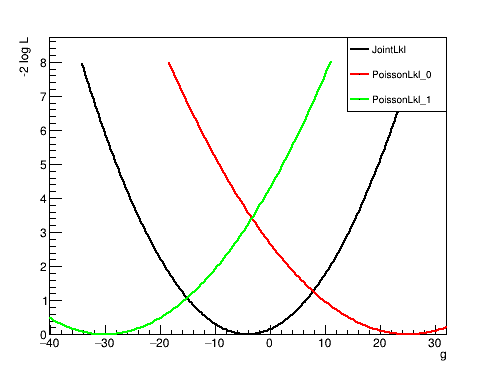

In [9]:
for index, p in enumerate(p_list):
    p.SetErrorDef(error_def)      
    p.ComputeLklVsG()
    p.PrintOverview()
    lkl_vs_g = p.GetLklVsG()
    lkl_vs_g.SetLineColor(index + 2)
    lkl_vs_g.SetLineWidth(2)
    legend.AddEntry(lkl_vs_g, p.GetName())
    lkl_vs_g.Draw("same")
legend.Draw("same")
c.Draw()

## Estimating the number of gamma-rays measured by a Cherenkov telescope
We assume $g$ is the number of gamma rays measured by some Cherenkov elescope from a given steady source in the On region, during a given known observation time, with known IRF and threshold.    
The spectrum of the source is a power law with index -2, reference energy $E_0=100\,{\rm GeV}$ and unknown normalization $k$

$$\frac{{\rm d}\phi}{{\rm d} E} = k\,\left( \frac{E}{100\,{\rm GeV}} \right)^{-2} = k\,\frac{{\rm d}f}{{\rm d}E}$$

we want to obtain $k$ with gLike, how do we scale from the number of predicted source counts, $g$, to spectral normalisation $k$? We use the observation time $T_{\rm obs}$ and the instrument response functions (effective area, $A_{\rm eff}(E)$, and energy migration $G(E'|E)$)

$$ g = T_{\rm obs}\,\int_{E'_{\rm min}}^{E'_{\rm max}}\;{\rm d}E'
\int\;{\rm d}E\,\frac{{\rm d}\phi}{{\rm d} E}\,A_{\rm eff}(E)\,G(E'|E) = 
k\;T_{\rm obs}\,\int_{E'_{\rm min}}^{E'_{\rm max}}\;{\rm d}E'
\int\;{\rm d}E\,\frac{{\rm d}f}{{\rm d} E}\,A_{\rm eff}(E)\,G(E'|E).
$$

The scaling factor between $g$ and $k$, identified with `UnitsOfG` in gLike, is therefore:

$$ k = \frac{g}{
T_{\rm obs}\,\int_{E'_{\rm min}}^{E'_{\rm max}}\;{\rm d}E'
\int\;{\rm d}E\,\frac{{\rm d}f}{{\rm d} E}\,A_{\rm eff}(E)\,G(E'|E)
},
$$

we consider the following simplifications:
- constant effective area with energy;
- perfect energy resolution;    

the `UnitsOfG` reduce to
$$\frac{1}{
T_{\rm obs}\,\int_{E_{\rm min}}^{E_{\rm max}}\;{\rm d}E\,\frac{{\rm d}f}{{\rm d} E}\,A_{\rm eff} 
} =
\frac{1}{T_{\rm obs}\,E_0^2 \left(\frac{1}{E_{\rm min}} - \frac{1}{E_{\rm max}}\right)\,A_{\rm eff}}.
$$
We will use `astropy`'s `units` to handle the units simplification

In [10]:
import numpy as np
import astropy.units as u

In [11]:
E_0 = 100 * u.GeV
E_min = np.asarray([100, 200]) * u.GeV
E_max = np.asarray([1e4, 1e4]) * u.GeV
t_obs = np.asarray([2, 1.8]) * u.h
A_eff = np.asarray([1, 0.89]) * 1e9 * u.Unit("cm2")
integral_df_de = np.power(E_0, 2) * (1 / E_min - 1 / E_max) 
units_of_g = (1 / (integral_df_de * A_eff * t_obs)).to("GeV-1 cm-2 s-1")

In [12]:
units_of_g

<Quantity [1.40291807e-15, 3.53866057e-15] 1 / (cm2 GeV s)>

set these units in each PoissonLkl objects

In [13]:
for p, unit_of_g in zip(p_list, units_of_g.value):
    p.SetUnitsOfG(unit_of_g)

In [14]:
j.ComputeLklVsG()

32.63254709651176

Lkl::ComputeLklVsG (JointLkl) Message: Finding minimum of -2logL... 
Lkl::MinimizeLkl (JointLkl) Message: minimizing -2logL
Lkl::CallMinimization (JointLkl) Results: Trial #1, g: 1.01e+01 +/- 2.83e+01 (1.41e-14 +/- 3.97e-14); -2logL = 32.6325; iflag = 0 (converged)
JointLkl::PrepareForLklScan (JointLkl) Message: call ComputeLklVsG for 2 samples:
Lkl::ComputeLklVsG (PoissonLkl_0) Message: computing -2logL in 200 points between g=-29.9873(-4.20697e-14), and g=50.1262(7.0323e-14), this could take a while
.................... Completed 200 points
Lkl::ComputeLklVsG (PoissonLkl_1) Message: computing -2logL in 200 points between g=-11.8886(-4.20697e-14), and g=19.8728(7.0323e-14), this could take a while
.................... Completed 200 points
Lkl::ComputeLklVsG (JointLkl) Message: computing -2logL in 200 points between g=-29.9873(-4.20697e-14), and g=50.1262(7.0323e-14), this could take a while
.................... Completed 200 points
Lkl::ComputeLklVsG (JointLkl) Message: g_min = 9.8681

In [15]:
j.PrintOverview()

 *  Name              = JointLkl
 *  Status            = 0 (converged)
 *  Delta(2logL)      = 4
 *  # of parameters   = 1 (1 free):
 *                  g = 9.86817 +/- 28.5045 (1.38442e-14 +/- 3.99895e-14)
 *  Units of G        = 1.40292e-15
 *  -2logL_min        = 32.6325
 *  # of samples      = 2
 ****************************************
                                        *  Name              = PoissonLkl_0
                                        *  Status            = 0 (converged)
                                        *  Delta(2logL)      = 4
                                        *  # of parameters   = 4 (1 free):
                                        *                  g = 9.86817 (1.38442e-14) (fixed)
                                        *                  b = 112.247 +/- 0.10247
                                        *                tau = 1 (fixed)
                                        *                eff = 1 (fixed)
                                        * 

Lkl::ComputeLklVsG (PoissonLkl_0) Message: Finding minimum of -2logL... 
Lkl::MinimizeLkl (PoissonLkl_0) Message: minimizing -2logL
Lkl::CallMinimization (PoissonLkl_0) Results: Trial #1, g: 2.50e+01 +/- 3.06e+01 (3.51e-14 +/- 4.30e-14); b: 1.05e+02 +/- 2.05e+01; tau: 1.00e+00 +/- 0.00e+00; eff: 1.00e+00 +/- 0.00e+00; -2logL = 13.2001; iflag = 0 (converged)
Lkl::ComputeLklVsG (PoissonLkl_0) Message: computing -2logL in 200 points between g=-18.3264(-2.57104e-14), and g=68.3534(9.58942e-14), this could take a while
.................... Completed 200 points
Lkl::ComputeLklVsG (PoissonLkl_0) Message: g_min = 24.7957 +/- 31.1316 (3.47863e-14 +/- 4.36752e-14), -2logLmin = 13.2003
 *  Name              = PoissonLkl_0
 *  Status            = 0 (converged)
 *  Delta(2logL)      = 4
 *  # of parameters   = 4 (2 free):
 *                  g = 24.7957 +/- 31.1316 (3.47863e-14 +/- 4.36752e-14)
 *                  b = 105.091 +/- 0.10247
 *                tau = 1 (fixed)
 *                eff = 1 (

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


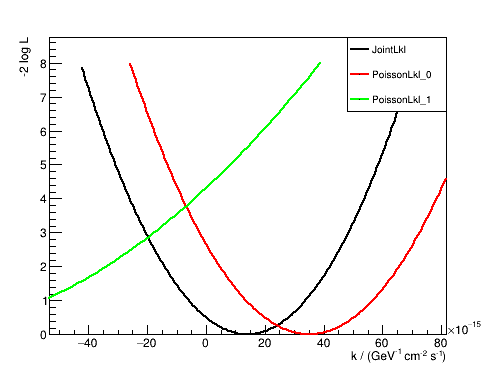

In [16]:
# plot the results with units
# plot the joint profiled likelihood with ROOT
from ROOT import TCanvas, TLegend
c = TCanvas("canvas", "canvas", 500, 400)
legend = TLegend(0.7, 0.7, 0.9, 0.9)
legend.SetTextSize(0.03)
lkl_vs_g = j.GetLklVsG() # TGraph holding the profile
lkl_vs_g.SetTitle("")
lkl_vs_g.SetLineWidth(2)
lkl_vs_g.GetXaxis().SetTitle("k / (GeV^{-1} cm^{-2} s^{-1})")
lkl_vs_g.GetYaxis().SetTitle("-2 log L")
legend.AddEntry(lkl_vs_g, "JointLkl")
lkl_vs_g.Draw()
legend.Draw("same")
# plot the individual likelihood profiles
for index, p in enumerate(p_list):
    p.SetErrorDef(error_def)      
    p.ComputeLklVsG()
    p.PrintOverview()
    lkl_vs_g = p.GetLklVsG()
    lkl_vs_g.SetLineColor(index + 2)
    lkl_vs_g.SetLineWidth(2)
    legend.AddEntry(lkl_vs_g, p.GetName())
    lkl_vs_g.Draw("same")
legend.Draw("same")
c.Draw()
c.Draw() # in pyroot also the canvas has to be drawn